# __Intor__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Markdown

In [2]:
def config1():
    plt.style.use('seaborn-v0_8-whitegrid')
    custom_params = {
        'figure.figsize': (15, 6),
        'font.size': 16,
        'font.weight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right':False,
        
    }
    plt.rcParams.update(custom_params)
    sns.set_palette(["#c7522a","#fbf2c4","#008585", "#003f5c", "#58508d", "#ffa600" , "#660e60","#6c584c"])
    
    
def config2():
    plt.style.use('seaborn-v0_8-dark-palette')
    custom_params = {
        'figure.figsize': (15, 6),
        'font.size': 16,
        'font.weight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right':False,
    }
    plt.rcParams.update(custom_params)
    sns.set_palette(["#c7522a","#fbf2c4","#008585", "#003f5c", "#58508d", "#ffa600", "#660e60","#6c584c"])

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
df = pd.read_csv(os.getcwd() + '\\data-2.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
nulls = (round(df.isnull().sum() / len(df) * 100,2)).apply(lambda x: f'{x} %').to_frame(name= 'Null Percentage')
nulls

,Null Percentage
InvoiceNo,0.0 %
StockCode,0.0 %
Description,0.27 %
Quantity,0.0 %
InvoiceDate,0.0 %
UnitPrice,0.0 %
CustomerID,24.93 %
Country,0.0 %


In [8]:
# utility functions
def outliers(df) :
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df <lower_bound) | (df > upper_bound)]
    return ls

def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(ls,inplace = True)

# __Univariate Analysis__

### InvoiceNo

In [9]:
df[['InvoiceNo']].describe().T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114


In [10]:
for i in sorted(df['InvoiceNo'].astype('str').unique()[-30:]):
    print(i)

581494
581495
581496
581497
581498
581500
581501
581502
581514
581516
581538
581566
581567
581570
581571
581572
581574
581578
581579
581580
581581
581582
581583
581584
581585
581586
581587
C581499
C581568
C581569


- there is Invoices have Id starts with C Indicates to Cancelation

In [11]:
cancelations = df[df['InvoiceNo'].str.startswith('C')]
print(f'Cancelation number : {len(cancelations)} rows')
cancelations.head(10)

Cancelation number : 9288 rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [12]:
df['InvoiceNo'].value_counts().sort_values(ascending=False).head(20)

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
580367     650
580115     645
581439     635
580983     629
578344     622
538349     620
578347     606
537638     601
537237     597
536876     593
Name: count, dtype: int64

<Axes: title={'center': 'Frequency of InvoiceNo'}, xlabel='Count', ylabel='InvoiceNo'>

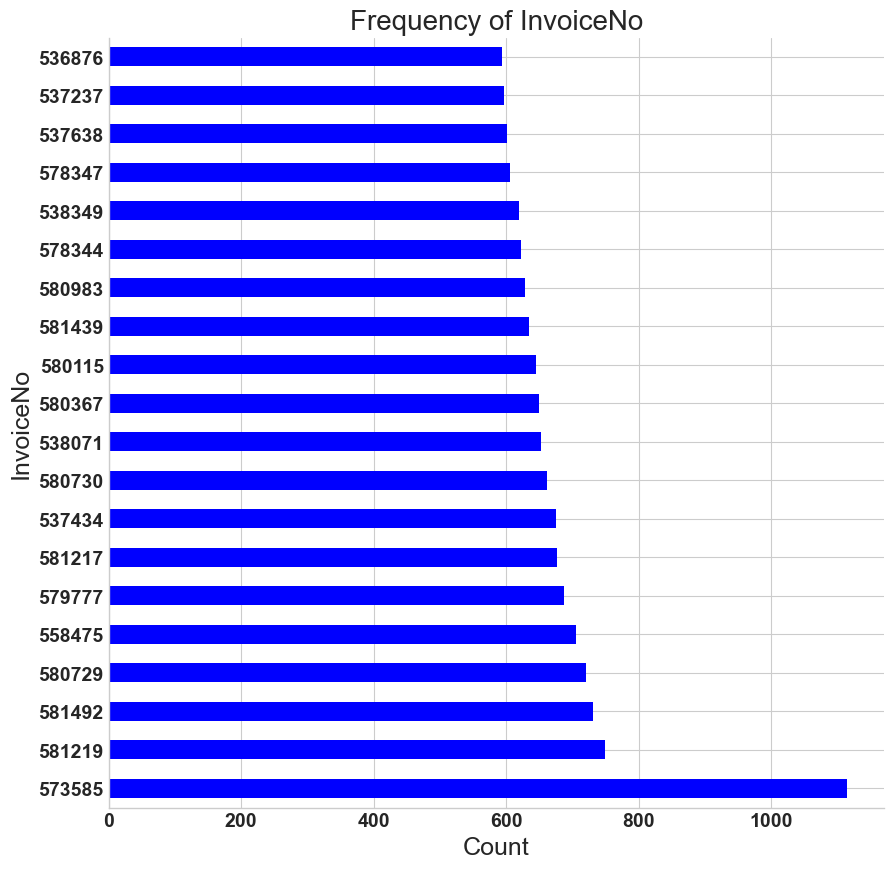

In [13]:
config1()
df['InvoiceNo'].value_counts().sort_values(ascending=False).head(20).plot(figsize=(10,10),
                                                                        kind='barh',
                                                                        color='b',
                                                                        title='Frequency of InvoiceNo',
                                                                        xlabel='Count')

### StockCode

In [14]:
df[['StockCode']].describe().T

,count,unique,top,freq
StockCode,541909,4070,85123A,2313


In [15]:
df['StockCode'].isna().sum()

0

<Axes: ylabel='StockCode'>

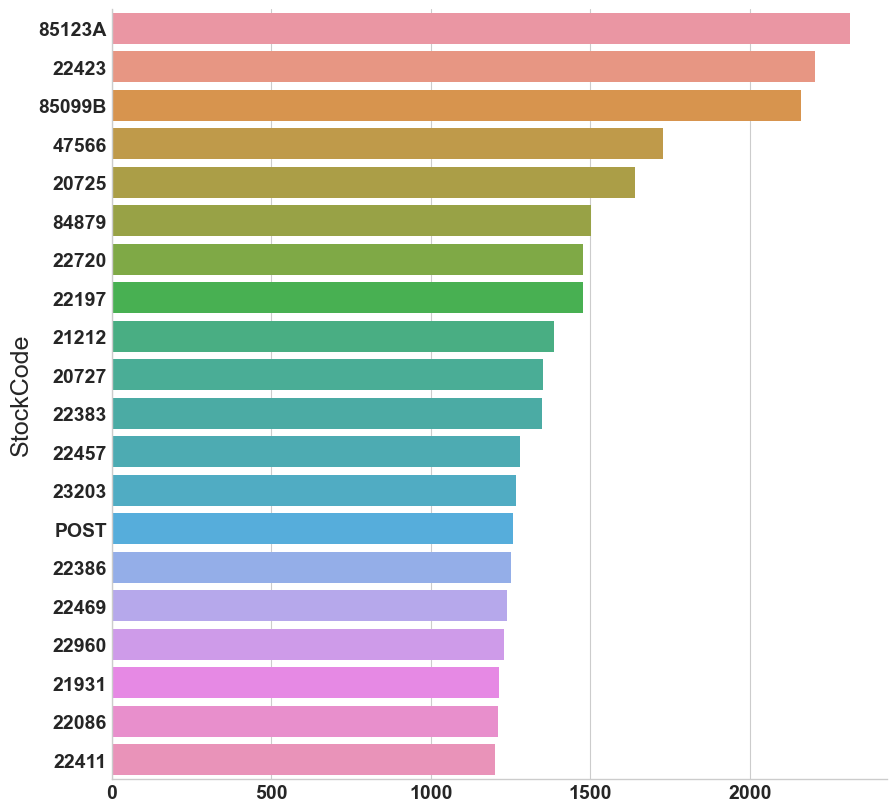

In [16]:
# groubed = df.groupby('StockCode')['StockCode'].count().sort_values(ascending=False).head(20)
groubed = df['StockCode'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,10))
sns.barplot(x= groubed.values , y= groubed.index )

### Description

In [17]:
df[['Description']].describe().T

,count,unique,top,freq
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369


In [18]:
df['Description'].isna().sum()

1454

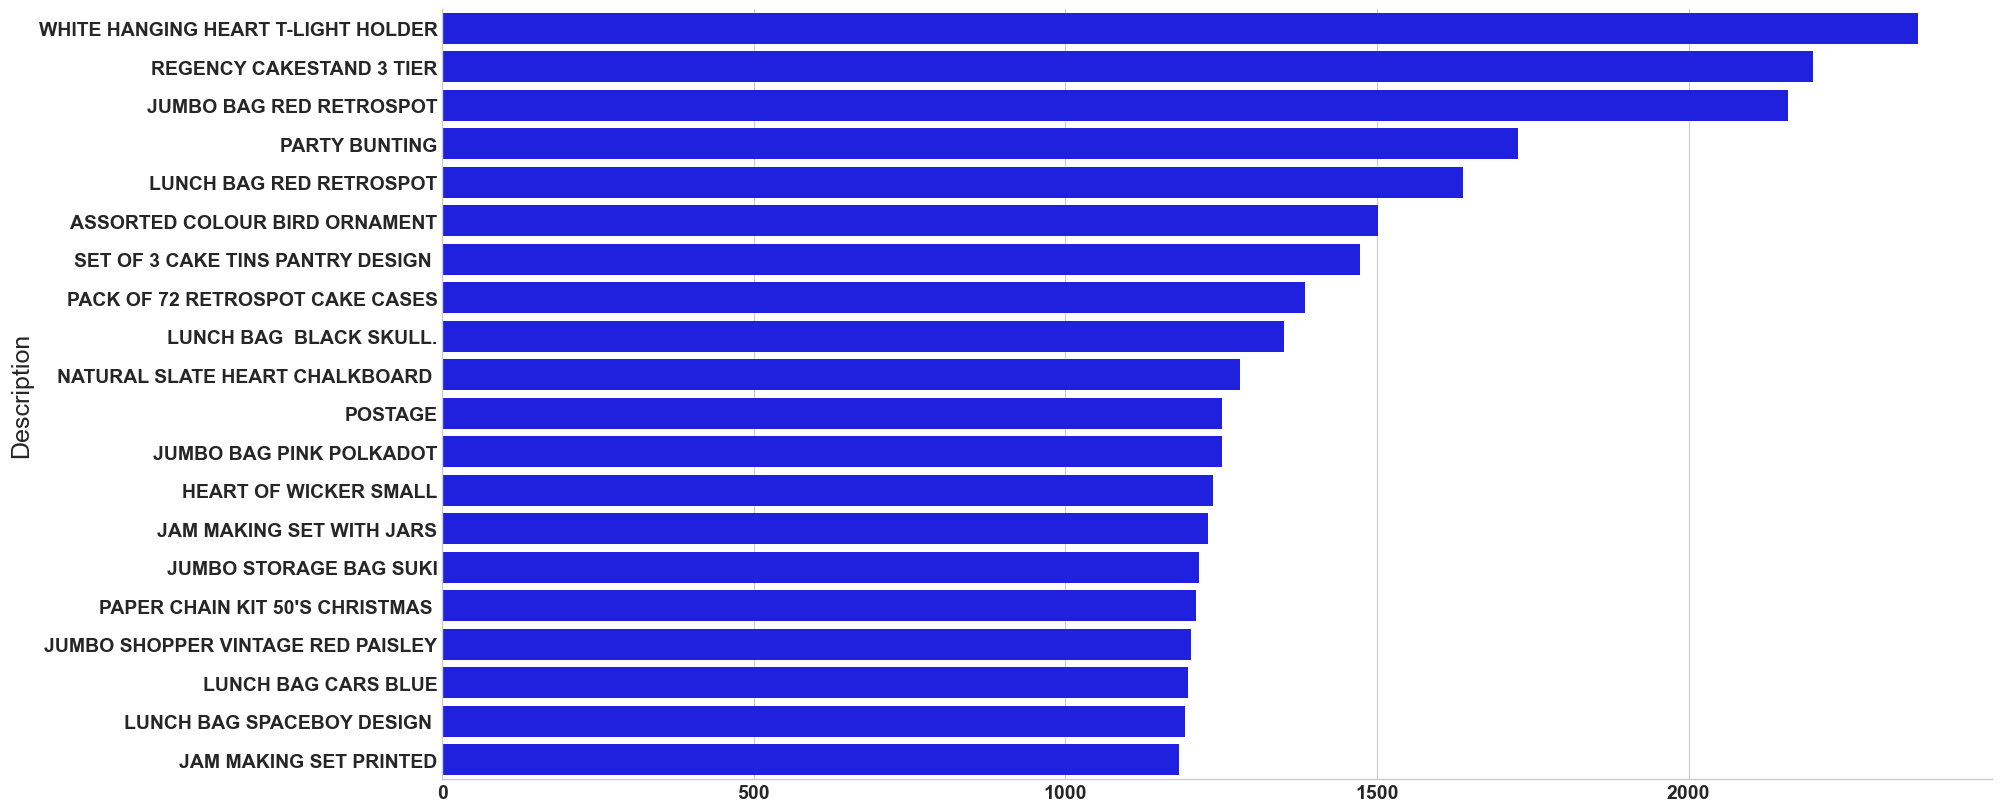

In [19]:
# groubed = df.groupby('Description')['Description'].count().sort_values(ascending=False).head(20)
groubed = df['Description'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize=(20,10))
sns.barplot(x= groubed.values , y= groubed.index , color='b')
plt.show()

In [20]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


__Observations__
- Description have nulls values and the same time UnitPrice is 0 value
- i will assume when Unit price is 0 it will be free item

### Quantity

In [21]:
df[['Quantity']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0


In [22]:
df['Quantity'].isna().sum()

0

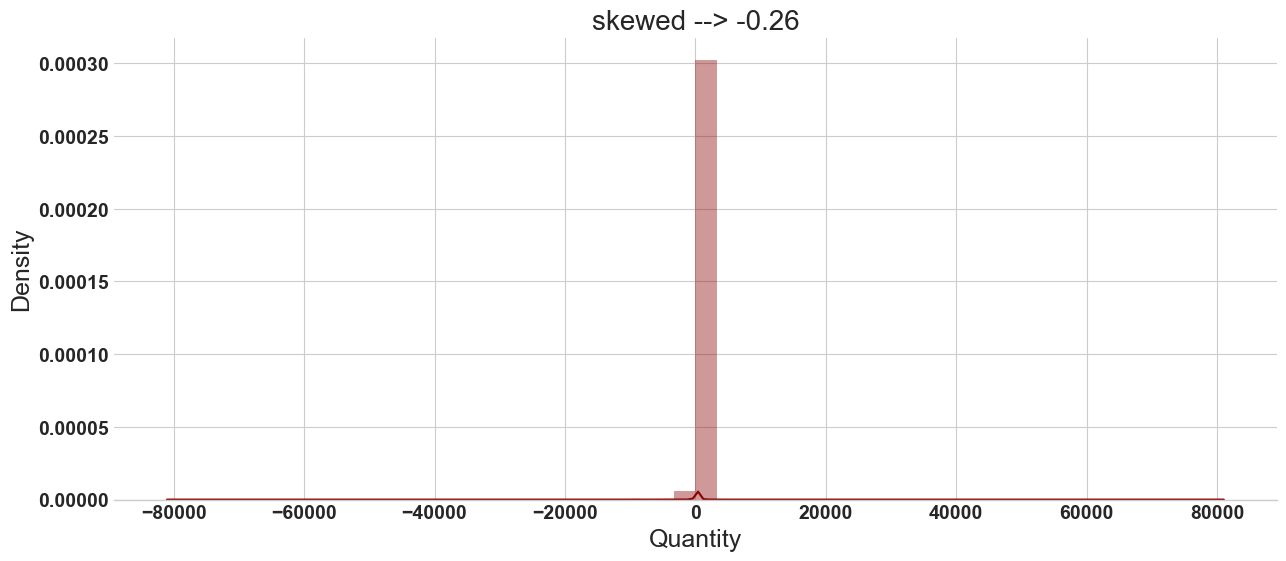

In [23]:
skew = round(df['Quantity'].skew(),2)
fig,ax = plt.subplots( dpi=100)
sns.despine(left=True)
sns.distplot(df['Quantity'],color = 'darkred' , ax=ax)
ax.set_title(f'skewed --> {skew}')
plt.show()

In [24]:
ls = outliers(df['Quantity'])
remove(df, ls)

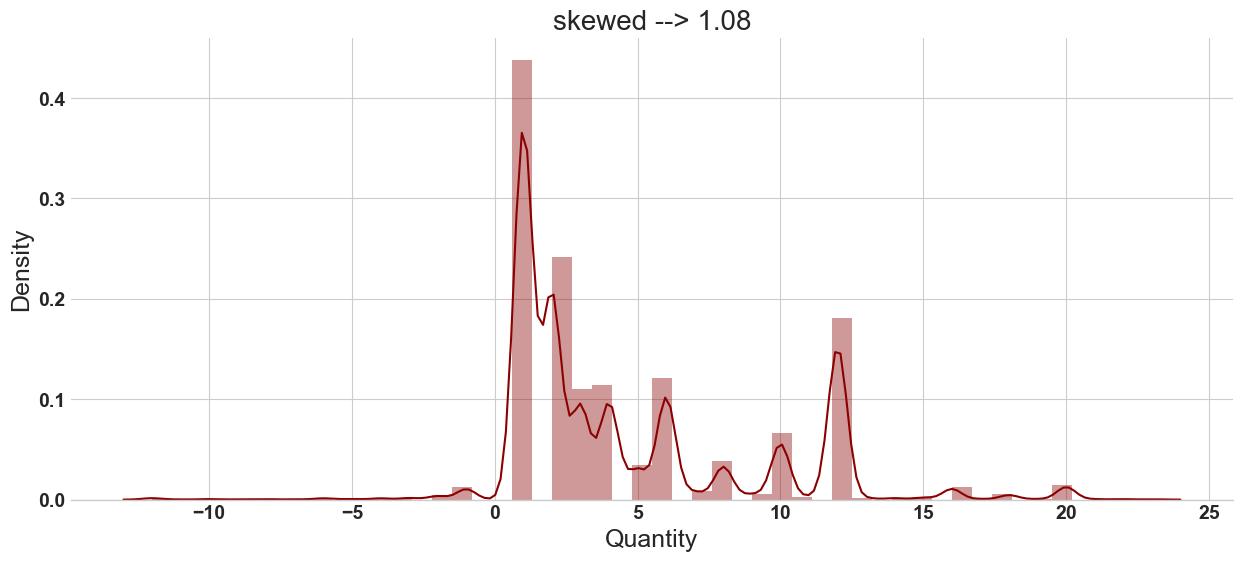

In [25]:
skew = round(df['Quantity'].skew(),2)
fig,ax = plt.subplots( dpi=100)
sns.despine(left=True)
sns.distplot(df['Quantity'],color = 'darkred' , ax=ax)
ax.set_title(f'skewed --> {skew}')
plt.show()

### InvoiceDate

In [26]:
df[['InvoiceDate']].describe().T

,count,unique,top,freq
InvoiceDate,483290,20857,10/31/2011 14:41,1088


In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['hour'] = df['InvoiceDate'].dt.hour
df['day_name'] = df['InvoiceDate'].dt.day_name()
df['month_name'] = df['InvoiceDate'].dt.month_name()

### UnitPrice

In [30]:
df[['UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,483290.0,5.013476,102.447232,-11062.06,1.25,2.46,4.15,38970.0


In [31]:
df['UnitPrice'].isna().sum()

0

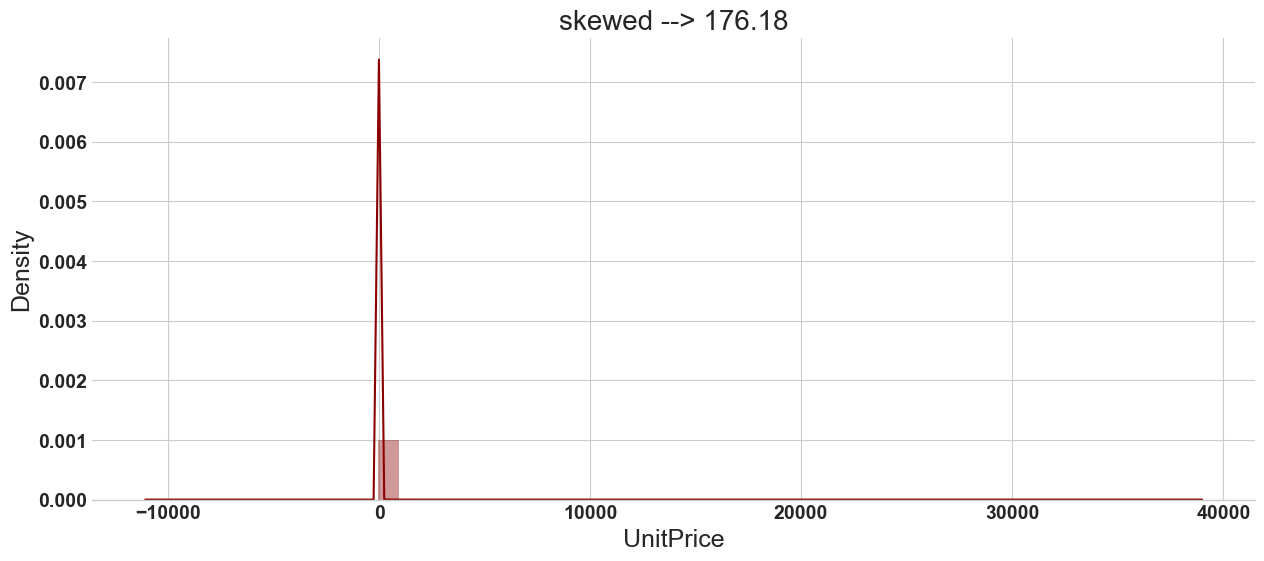

In [32]:
skew = round(df['UnitPrice'].skew(),2)
fig,ax = plt.subplots( dpi=100)
sns.despine(left=True)
sns.distplot(df['UnitPrice'],color = 'darkred' , ax=ax)
ax.set_title(f'skewed --> {skew}')
plt.show()

In [33]:
df[(df['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,day_name,month_name
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,2011,8,12,14,Friday,August
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,2011,8,12,14,Friday,August


In [34]:
rows_to_delete = df[df['UnitPrice'] < 0].index
df.drop(rows_to_delete, inplace=True)

### Country

In [35]:
df[['Country']].describe().T

,count,unique,top,freq
Country,483288,38,United Kingdom,447320


In [36]:
df['Country'].isna().sum()

0

In [37]:
# grouped = df['Country'].value_counts().head(20)
# fig = plt.figure(figsize=(20,10))
# sns.barplot(grouped.values,grouped.index)

In [38]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       802
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131986
Country             0
year                0
month               0
day                 0
hour                0
day_name            0
month_name          0
dtype: int64

In [39]:
# def calculate_flags(row):
#     is_free = 1 if row['Quantity'] > 0 and row['UnitPrice'] == 0 else 0
#     is_canceld = 1 if row['InvoiceNo'].startswith('C') else 0 
#     item_problem = 1 if row['Quantity'] < 0 else 0
#     return pd.Series([is_free, is_canceld, item_problem], index=['is_free', 'is_canceld', 'item_problem'])

# df[['is_free', 'is_canceld', 'item_problem']] = df.apply(calculate_flags, axis=1)

# __Feature Engineering From Univariate analysis__

#### create column for items that have problems

In [40]:
df[(df['Quantity'] <=0) & (df['UnitPrice'] ==0)]['Description'].value_counts().head(20)

Description
damaged                     21
check                       15
ebay                         5
Damaged                      3
sold as set on dotcom        3
damages                      3
showroom                     1
Crushed                      1
re-adjustment                1
smashed                      1
thrown away                  1
found some more on shelf     1
Show Samples                 1
damages/showroom etc         1
crushed                      1
DAMAGED                      1
dotcom                       1
Name: count, dtype: int64

In [41]:
df['item_problem'] = 0
df.loc[(df['Quantity'] < 0), 'item_problem'] = 1

In [42]:
df['item_problem'].value_counts()

item_problem
0    474648
1      8640
Name: count, dtype: int64

#### create column for free items

In [43]:
df[(df['Quantity'] >0) & (df['UnitPrice'] ==0)]['Description'].value_counts()

Description
check                                 23
adjustment                            11
FRENCH BLUE METAL DOOR SIGN 1          9
FRENCH BLUE METAL DOOR SIGN 8          8
found                                  8
                                      ..
ROUND CAKE TIN VINTAGE GREEN           1
VINTAGE HEADS AND TAILS CARD GAME      1
RED RETROSPOT TEA CUP AND SAUCER       1
DOORSTOP RACING CAR DESIGN             1
CLASSIC GLASS COOKIE JAR               1
Name: count, Length: 206, dtype: int64

In [44]:
df['UnitPrice'].describe()

count    483288.000000
mean          5.059275
std          99.943053
min           0.000000
25%           1.250000
50%           2.460000
75%           4.150000
max       38970.000000
Name: UnitPrice, dtype: float64

In [45]:
df[(df['Quantity'] > 0) & (df['UnitPrice']==0)]['Description'].value_counts().head(30)

Description
check                                23
adjustment                           11
FRENCH BLUE METAL DOOR SIGN 1         9
FRENCH BLUE METAL DOOR SIGN 8         8
found                                 8
FRENCH BLUE METAL DOOR SIGN 4         7
RECIPE BOX PANTRY YELLOW DESIGN       7
FRENCH BLUE METAL DOOR SIGN No        7
FRENCH BLUE METAL DOOR SIGN 3         7
Amazon                                7
OWL DOORSTOP                          7
FRENCH BLUE METAL DOOR SIGN 7         6
FRENCH BLUE METAL DOOR SIGN 6         6
FRENCH BLUE METAL DOOR SIGN 9         6
Manual                                6
RED KITCHEN SCALES                    6
MINT KITCHEN SCALES                   6
FRENCH BLUE METAL DOOR SIGN 5         6
amazon                                5
ENAMEL WATERING CAN CREAM             5
DOORMAT WELCOME TO OUR HOME           5
CHILDS GARDEN SPADE BLUE              5
IVORY KITCHEN SCALES                  5
RECIPE BOX BLUE SKETCHBOOK DESIGN     5
FRENCH BLUE METAL DOOR SIGN 

In [46]:
df['is_free'] = 0
df.loc[(df['Quantity'] > 0) & (df['UnitPrice']==0),'is_free'] = 1

In [47]:
df['is_free'].value_counts()

is_free
0    482381
1       907
Name: count, dtype: int64

#### create column for canceld items

In [48]:
df['is_canceld'] = 0
df.loc[(df['InvoiceNo'].str.startswith('C')), 'is_canceld'] = 1

In [49]:
# Create a new column called "Revenue" by multiplying Quantity with UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [98]:
df_without_free = df[df['is_free']==0]

In [99]:
df[(df['Description'] == 'Discount') & (df['is_canceld'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,day_name,month_name,item_problem,is_free,is_canceld,Revenue
273935,C560869,D,Discount,-1,2011-07-21 14:32:00,66.24,12830.0,United Kingdom,2011,7,21,14,Thursday,July,1,0,1,-66.24
332535,C566078,D,Discount,-1,2011-09-09 09:38:00,45.33,13137.0,United Kingdom,2011,9,9,9,Friday,September,1,0,1,-45.33
140555,C548411,D,Discount,-1,2011-03-31 10:36:00,162.24,13316.0,United Kingdom,2011,3,31,10,Thursday,March,1,0,1,-162.24
320697,C565075,D,Discount,-1,2011-08-31 17:25:00,36.30,13408.0,United Kingdom,2011,8,31,17,Wednesday,August,1,0,1,-36.30
320698,C565075,D,Discount,-1,2011-08-31 17:25:00,38.39,13408.0,United Kingdom,2011,8,31,17,Wednesday,August,1,0,1,-38.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,2010,12,8,16,Wednesday,December,1,0,1,-267.12
88211,C543789,D,Discount,-1,2011-02-11 17:10:00,84.80,17450.0,United Kingdom,2011,2,11,17,Friday,February,1,0,1,-84.80
150591,C549452,D,Discount,-1,2011-04-08 14:17:00,1867.86,17940.0,United Kingdom,2011,4,8,14,Friday,April,1,0,1,-1867.86
169541,C551190,D,Discount,-1,2011-04-27 10:22:00,120.00,17940.0,United Kingdom,2011,4,27,10,Wednesday,April,1,0,1,-120.00


# __Answer Some Questions__

### RFM Segmentation

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,day_name,month_name,item_problem,is_free,is_canceld,Revenue
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,25.2
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,17.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,39.0
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,15.0
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,15.0


1) What is the average number of days between a customer's purchases

In [101]:
# df.groupby('CustomerID')['InvoiceDate'].diff().dt.days.head(30)

In [102]:
# Sort the data by CustomerID and InvoiceDate
df.sort_values(['CustomerID', 'InvoiceDate'], inplace=True)

# Calculate the difference in days between adjacent purchases for each customer
diff = df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average number of days between purchases for all customers
avg_days_between_purchases = diff.mean()

print("The average number of days between a customer's purchases is:", avg_days_between_purchases)

The average number of days between a customer's purchases is: 1.5932078364025621


In [103]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'day_name', 'month_name', 'item_problem', 'is_free', 'is_canceld',
       'Revenue'],
      dtype='object')

How many times has each customer made a purchase in the last six months?

In [104]:
import datetime

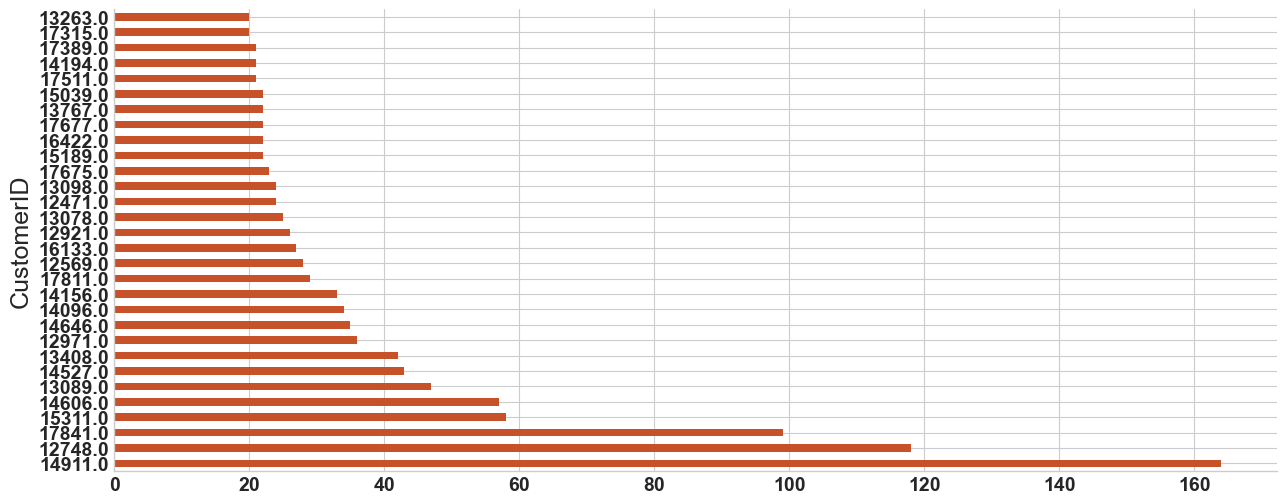

In [105]:
#update dataframe to have last 6 months only
max_date = df['InvoiceDate'].max()
start_date = max_date- datetime.timedelta(days=6*30)
new_df = df[df['InvoiceDate']>start_date]

#plot
new_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(30).plot(kind='barh')
plt.show()

What is the monetary value of each customer's purchases in the last year?

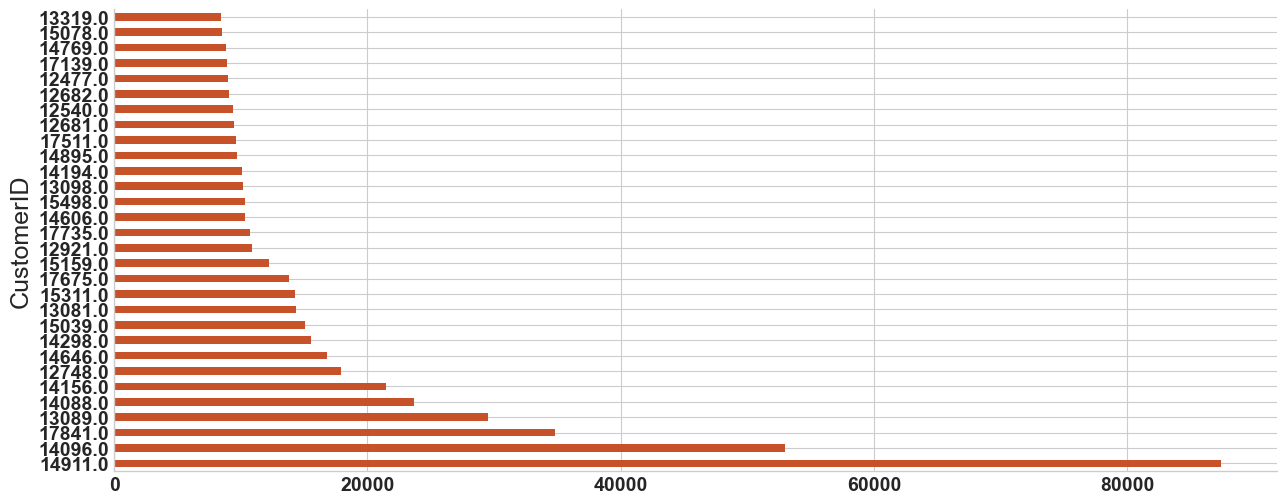

In [106]:
#update dataframe to have last 6 months only
max_date = df['InvoiceDate'].max()
start_date = max_date- datetime.timedelta(days=12*30)
new_df = df[df['InvoiceDate']>start_date]

#plot
new_df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(30).plot(kind='barh')
plt.show()

What is the frequency of each customer's purchases in the last year?

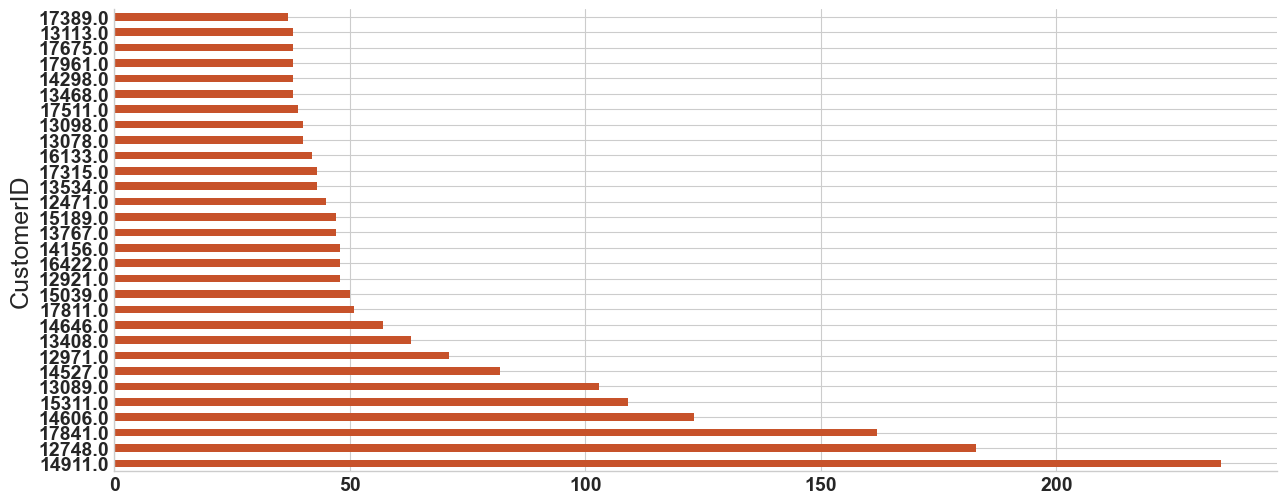

In [107]:


#plot
new_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(30).plot(kind='barh')
plt.show()

Which customers have made high-value purchases but have not returned recently?

<Axes: ylabel='Frequency'>

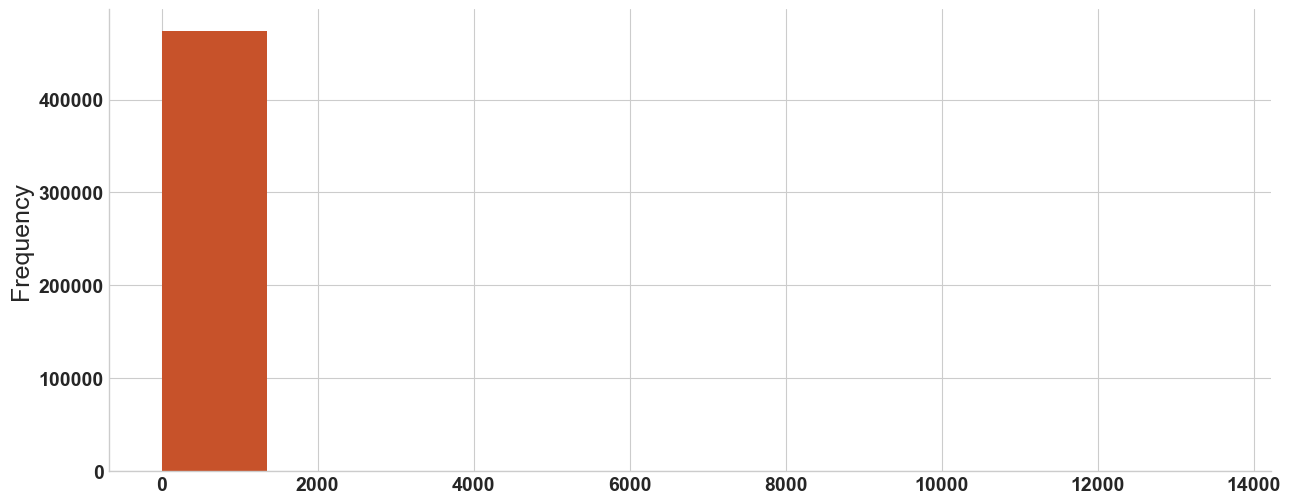

In [108]:
df.loc[df['Revenue']>0, 'Revenue'].plot(kind='hist')

So we will assume high value purchas is that greter than 2000

In [109]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'day_name', 'month_name', 'item_problem', 'is_free', 'is_canceld',
       'Revenue'],
      dtype='object')

In [110]:
revenue_list = df.groupby('CustomerID')['Revenue'].sum()
last_date = df.groupby('CustomerID')['InvoiceDate'].max()
last_30_day = max_date - datetime.timedelta(days=30)
# Identify the customers who have made high-value purchases but have not returned recently
high_value_customers = (revenue_list >= 1000) & (last_date <= last_30_day)

# Print the list of high-value customers who have not returned recently
print(high_value_customers[high_value_customers].index.tolist())

[12352.0, 12357.0, 12360.0, 12370.0, 12371.0, 12377.0, 12378.0, 12383.0, 12393.0, 12397.0, 12398.0, 12405.0, 12407.0, 12408.0, 12409.0, 12431.0, 12432.0, 12446.0, 12455.0, 12456.0, 12457.0, 12463.0, 12472.0, 12484.0, 12501.0, 12502.0, 12520.0, 12530.0, 12546.0, 12576.0, 12585.0, 12594.0, 12613.0, 12625.0, 12633.0, 12635.0, 12637.0, 12645.0, 12669.0, 12678.0, 12688.0, 12721.0, 12744.0, 12758.0, 12759.0, 12764.0, 12815.0, 12836.0, 12840.0, 12843.0, 12853.0, 12854.0, 12857.0, 12868.0, 12876.0, 12885.0, 12886.0, 12909.0, 12916.0, 12928.0, 12947.0, 12949.0, 12980.0, 13015.0, 13047.0, 13055.0, 13082.0, 13093.0, 13097.0, 13110.0, 13124.0, 13134.0, 13136.0, 13141.0, 13151.0, 13157.0, 13158.0, 13168.0, 13186.0, 13208.0, 13213.0, 13224.0, 13265.0, 13317.0, 13320.0, 13324.0, 13327.0, 13334.0, 13340.0, 13344.0, 13373.0, 13384.0, 13397.0, 13421.0, 13422.0, 13475.0, 13476.0, 13477.0, 13481.0, 13491.0, 13492.0, 13505.0, 13517.0, 13520.0, 13523.0, 13527.0, 13538.0, 13552.0, 13555.0, 13562.0, 13591.0, 

Which customers have made frequent purchases but with low total revenue?

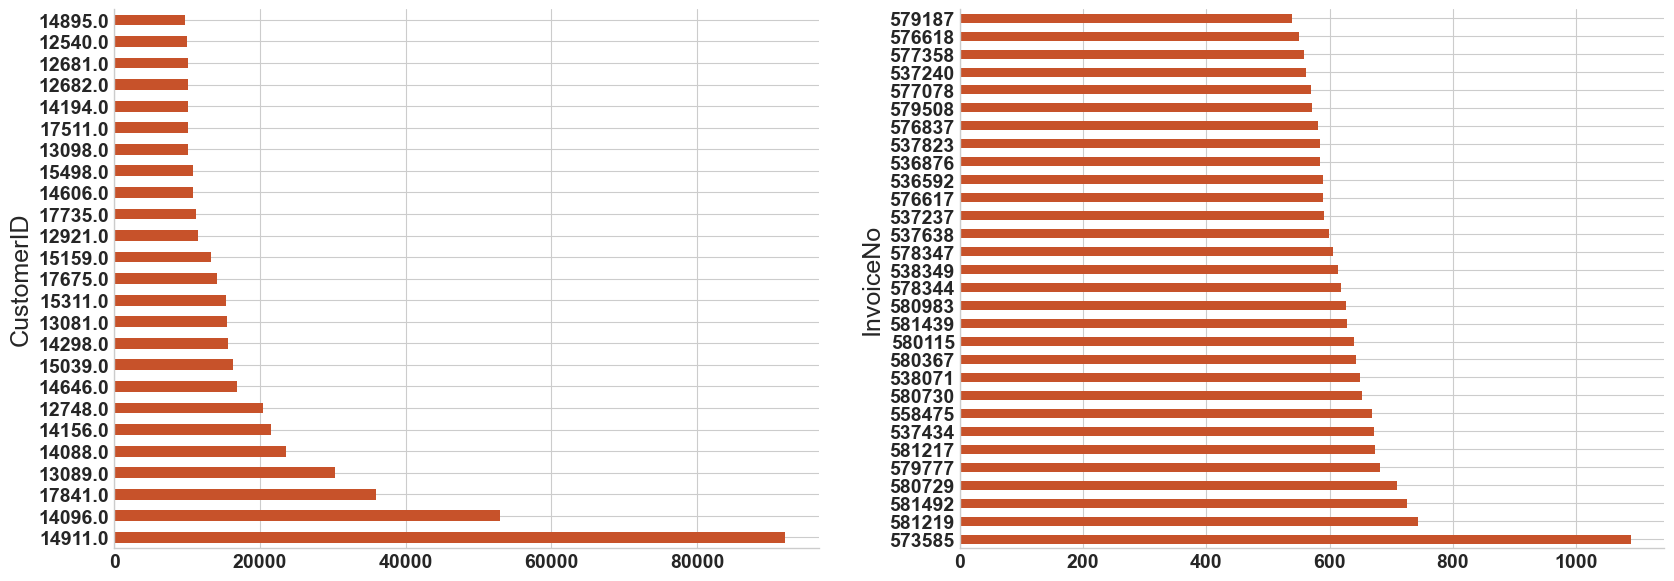

In [111]:
# create a figure object with 2 subplots
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize= (20,7))
ax1 = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(25).plot(kind='barh', ax=ax1)
ax2 = df['InvoiceNo'].value_counts().head(30).plot(kind='barh', ax=ax2)
plt.show()

- So i will assume that low revenue customers that are lower than __20000__
- and high_purchase_customers are higher than __200__ 

In [112]:
revenue_by_customer = df.groupby('CustomerID')['Revenue'].sum()


low_revenue_customers = revenue_by_customer[revenue_by_customer < 20000]


purchases_by_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()


frequent_customers = purchases_by_customer.sort_values(ascending=False)

invoice_counts = df['InvoiceNo'].value_counts()
high_purchase_customers = df[df['InvoiceNo'].isin(invoice_counts[invoice_counts > 200].index)].index


low_revenue_frequent_customers = frequent_customers[~frequent_customers.index.isin(high_purchase_customers)]


low_revenue_frequent_customers

CustomerID
14911.0    244
12748.0    209
17841.0    168
14606.0    128
13089.0    107
          ... 
13080.0      1
13095.0      1
13101.0      1
13103.0      1
16351.0      1
Name: InvoiceNo, Length: 2959, dtype: int64

### order segmentation:

In [113]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'day_name', 'month_name', 'item_problem', 'is_free', 'is_canceld',
       'Revenue'],
      dtype='object')

What is the most common quantity of items per order?

In [114]:
df['InvoiceNo'].value_counts().median()

10.0

Which day of the week had the most orders?

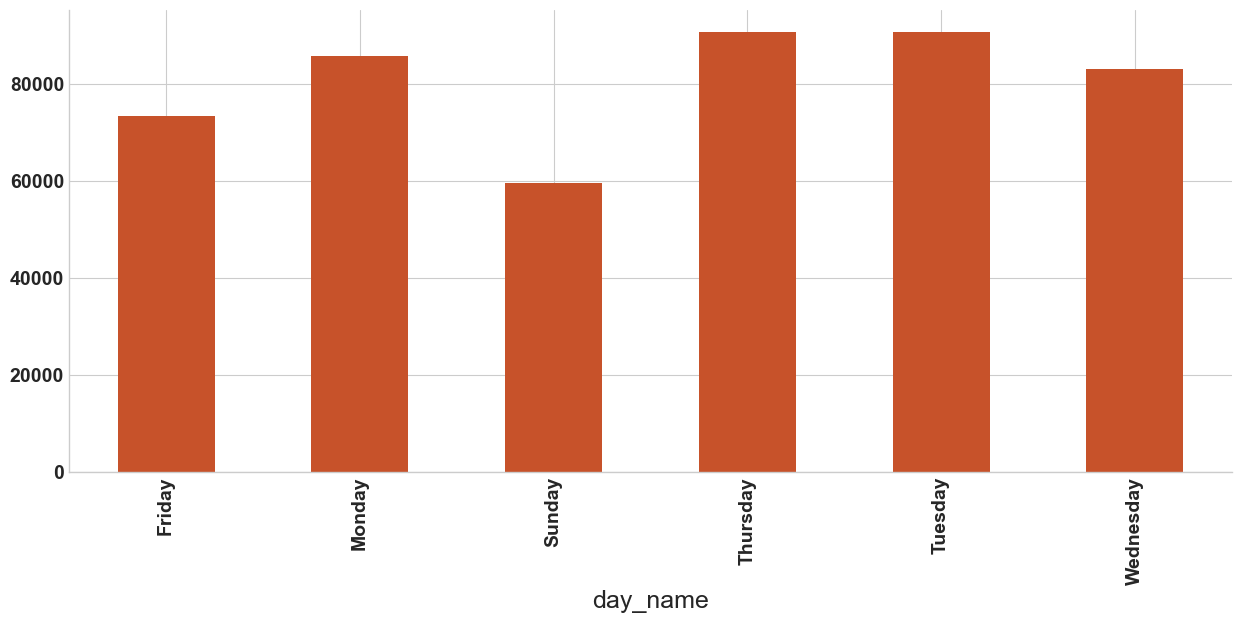

In [115]:
df.groupby('day_name')['InvoiceNo'].count().plot(kind='bar')
plt.show()

What is the average time between orders?

In [116]:
# # Sort dataframe by InvoiceDate
# df.sort_values(by=['InvoiceDate'], inplace=True)

# # Calculate time differences between consecutive orders
# time_diffs = df['InvoiceDate'].diff()

# # Calculate average time between orders
# avg_time_between_orders = time_diffs.median()

# print(avg_time_between_orders)

In [117]:
new_df = df.groupby('CustomerID').apply(lambda x: x.sort_values('InvoiceDate'))
new_df['timediff'] = new_df['InvoiceDate'].diff()
avg_time_per_cust = new_df['timediff'].mean()
print(avg_time_per_cust)

0 days 00:01:15.949570311


Which hour of the day had the most orders?

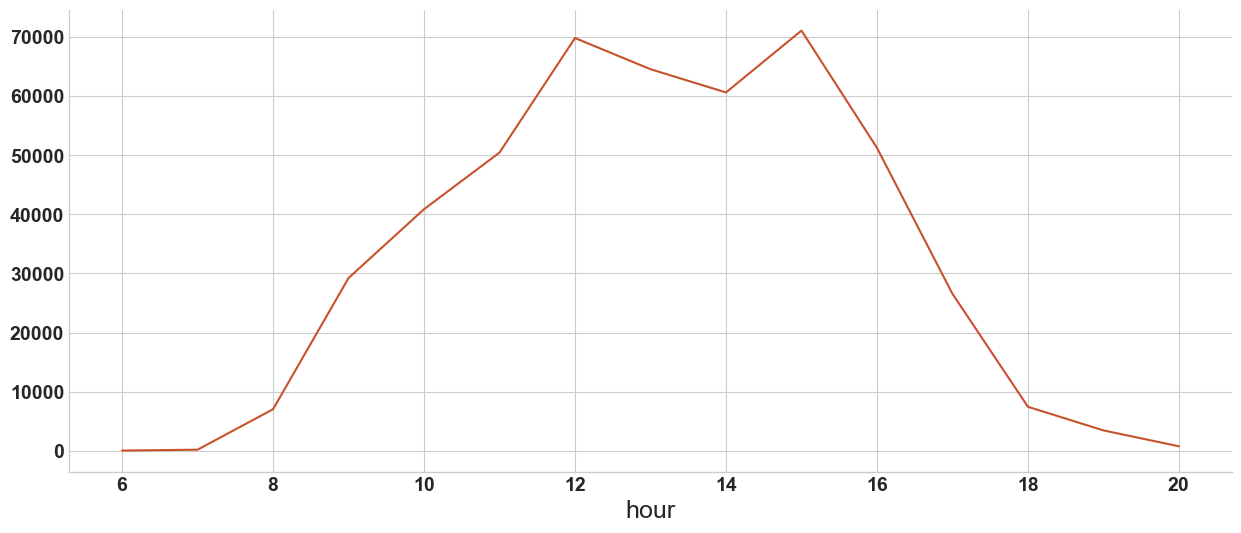

In [118]:
df.groupby('hour')['InvoiceNo'].count().plot()
plt.show()

How many orders cancelled?

In [119]:
sm = df['is_canceld'].sum()
print(f'canceled orders is {sm} from {len(df)} orders')

canceled orders is 8207 from 483288 orders


In [120]:
sm = df['is_free'].sum()
print(f'free orders is {sm} from {len(df)} orders')

free orders is 907 from 483288 orders


>- ___Which orders had the highest revenue?___

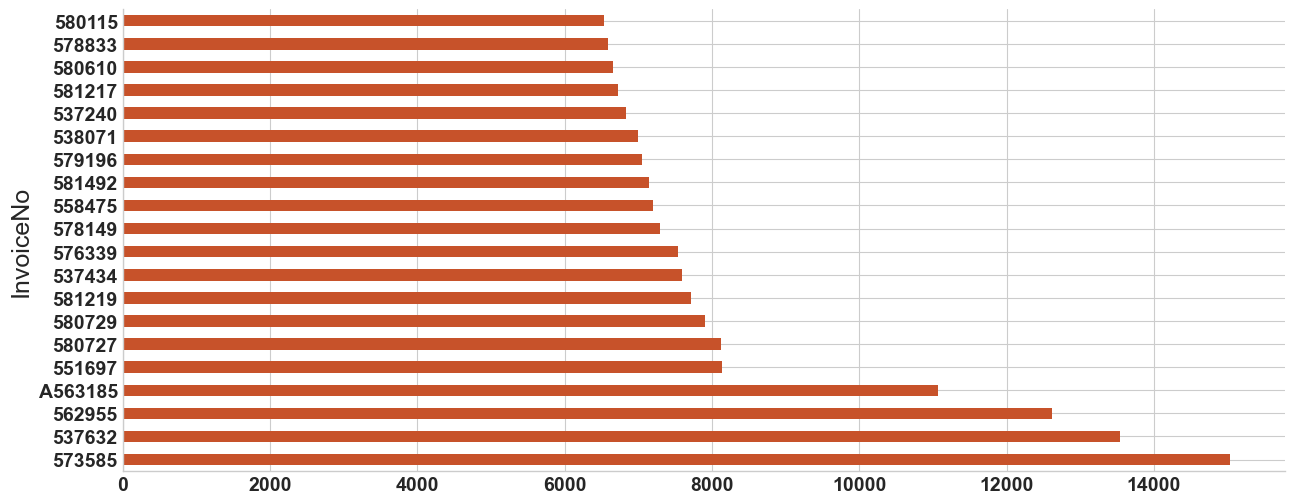

In [121]:
df.groupby('InvoiceNo')['Revenue'].sum().sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

### Time segmentation:

> - ___What was the total revenue generated for each year?___

In [122]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'day_name', 'month_name', 'item_problem', 'is_free', 'is_canceld',
       'Revenue'],
      dtype='object')

<Axes: xlabel='year'>

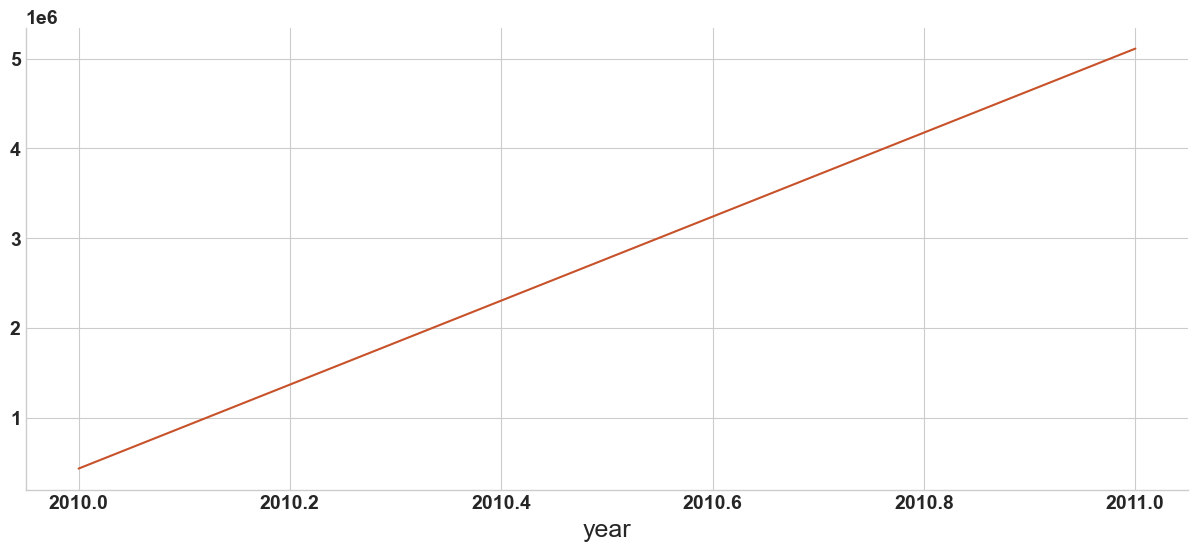

In [123]:
df.groupby('year')['Revenue'].sum().plot()


> - ___Which month had the least revenue?___

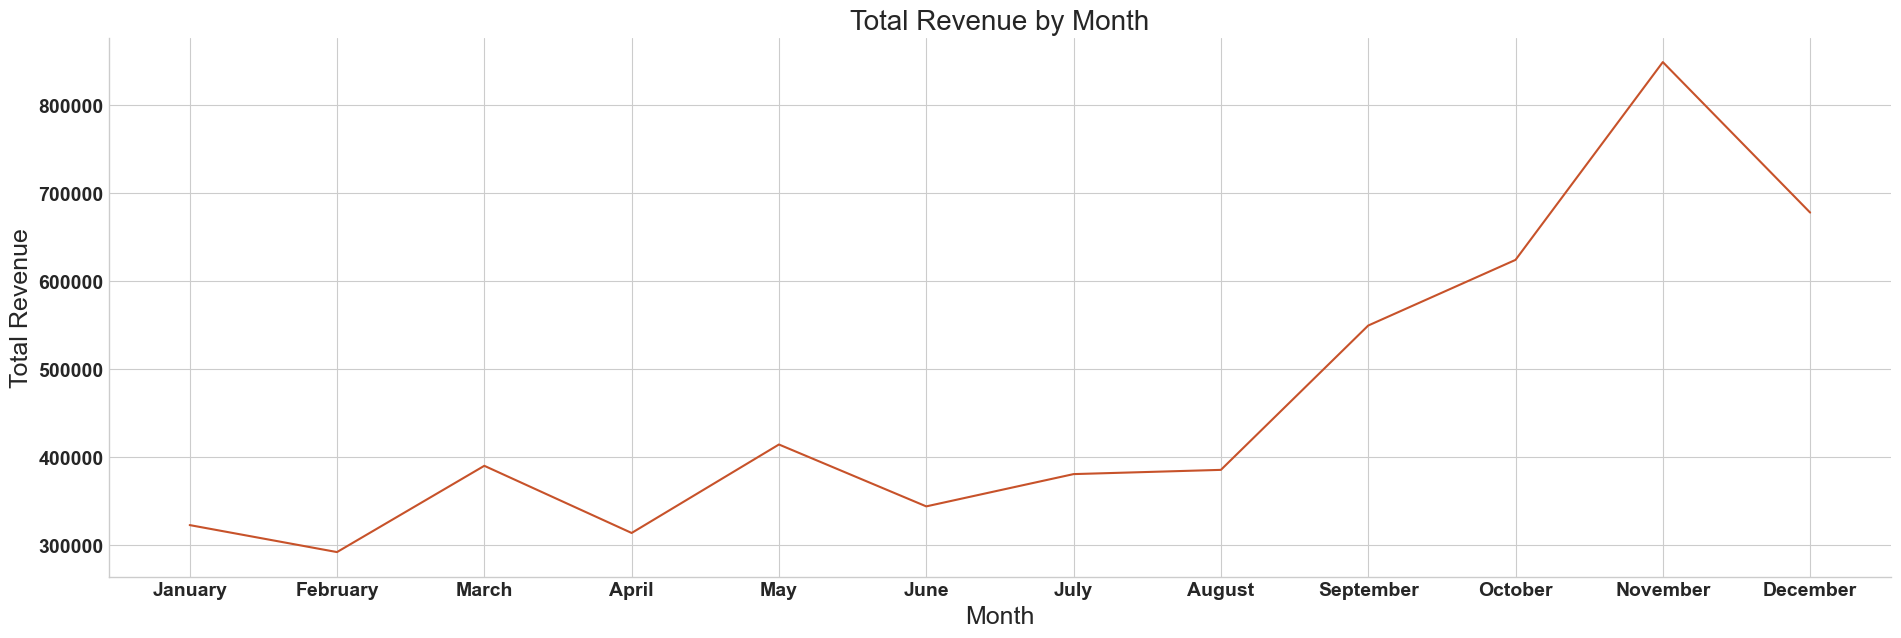

__Observations__

- The least revenue is in __(2, 'February')__ with value __292123.71__

- The revenue is generally higher towards the end of the year, with November and December having significantly higher revenue than other months.

- There is a dip in revenue in February before it picks up again in March.

- May and June have relatively high revenue compared to some of the other months.

- September has lower revenue compared to August and October.

In [124]:
revenue_by_month = df.groupby(['month', 'month_name'])['Revenue'].sum()

# Plot total revenue by month as a bar chart
ax = revenue_by_month.reset_index(level='month_name').set_index('month_name')['Revenue'].plot(figsize=(23,7),xlabel='Month', ylabel='Total Revenue', title='Total Revenue by Month')

# Set the tick locations and labels manually
ticks = range(len(revenue_by_month.index.get_level_values('month_name')))
labels = revenue_by_month.index.get_level_values('month_name')
plt.xticks(ticks=ticks, labels=labels, rotation=0)

plt.show()


idx = revenue_by_month.idxmin()
val = revenue_by_month.loc[idx]
display(Markdown('__Observations__'))
display(Markdown(f'- The least revenue is in __{idx}__ with value __{val}__'))
display(Markdown('- The revenue is generally higher towards the end of the year, with November and December having significantly higher revenue than other months.'))
display(Markdown('- There is a dip in revenue in February before it picks up again in March.'))
display(Markdown('- May and June have relatively high revenue compared to some of the other months.'))
display(Markdown('- September has lower revenue compared to August and October.'))


# The revenue is generally higher towards the end of the year, with November and December having significantly higher revenue than other months.
# There is a dip in revenue in February before it picks up again in March.
# May and June have relatively high revenue compared to some of the other months.
# September has lower revenue compared to August and October.

### User Segmentation

In [125]:
no_canc = df[(df['is_canceld'] == 0) & (df['item_problem'] == 0)]

In [126]:
no_canc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,day_name,month_name,item_problem,is_free,is_canceld,Revenue
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,25.2
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,17.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,39.0
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,15.0
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,15.0


###### number of users purchase from each country :-

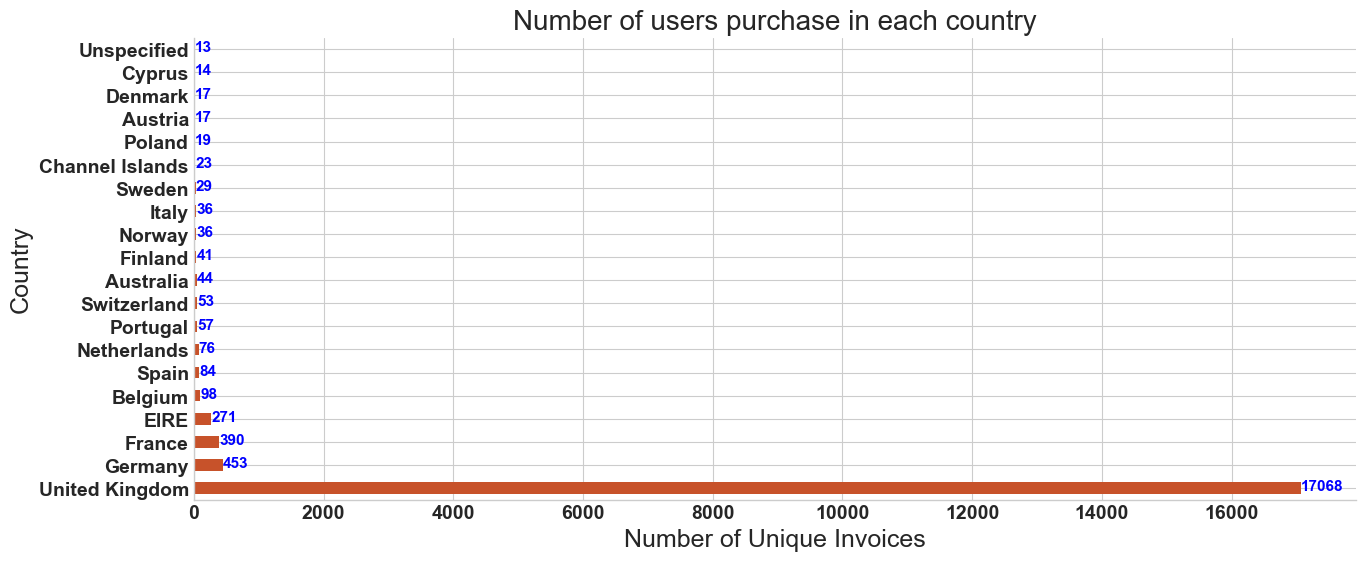

In [127]:
grouped = no_canc.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(20)

# Create a horizontal bar plot
ax = grouped.plot(kind='barh')
plt.title('Number of users purchase in each country')
plt.xlabel('Number of Unique Invoices')
plt.ylabel('Country')

# Add text labels to the bars
for i, v in enumerate(grouped):
    ax.text(v + 0.1, i - 0.1, str(v), color='blue', fontsize=11)

plt.show()

In [128]:

# config2()
# grouped = no_canc.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(20)
# ax = grouped.plot(kind='bar')
# plt.title('Number of users purchase in each country')
# plt.xlabel('Number of Unique Invoices')
# plt.ylabel('Country')

# for i, v in enumerate(grouped):
#     ax.text(i - 0.2, v + 0.1, str(v), color='blue', fontsize=11)

# plt.show()

In [129]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,day_name,month_name,item_problem,is_free,is_canceld,Revenue
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,25.2
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,17.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,39.0
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,15.0
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010,12,7,14,Tuesday,December,0,0,0,15.0


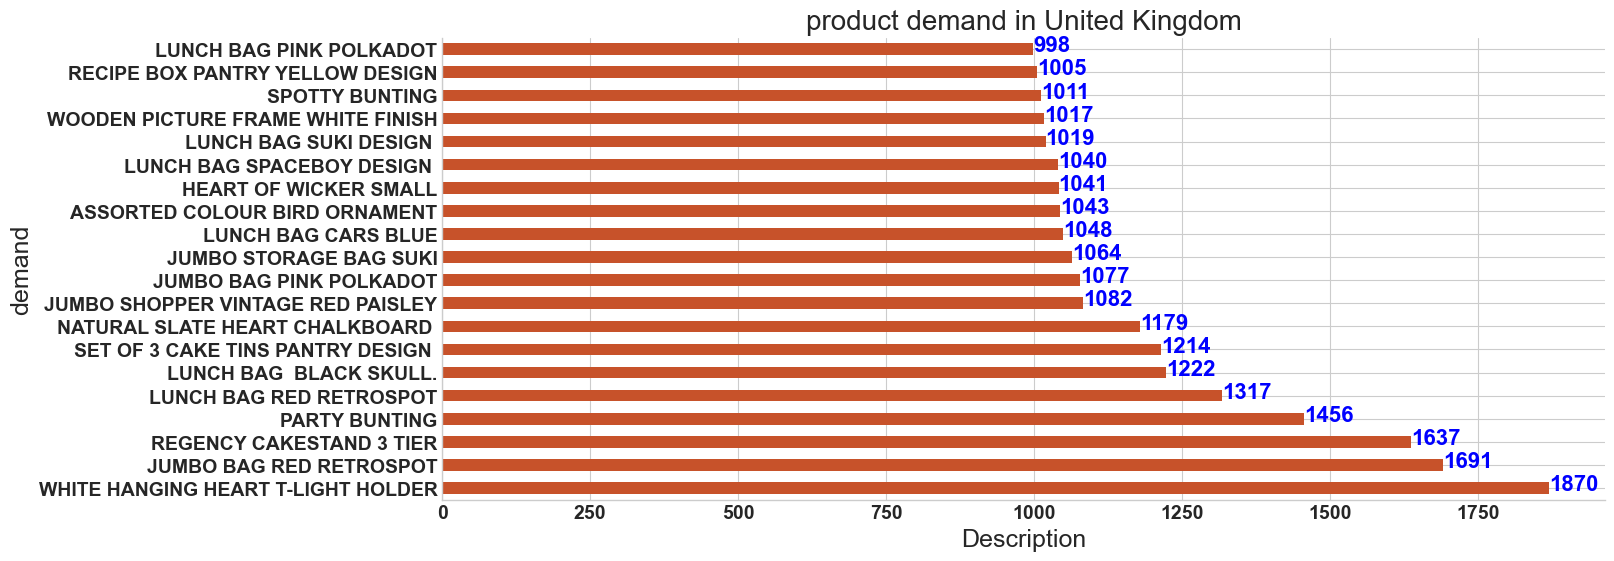

In [130]:
config2()
grouped = no_canc[(df['Country'] == 'United Kingdom')].groupby('Description')['Description'].count().sort_values(ascending = False).head(20)
ax = grouped.plot(kind='barh')
plt.title('product demand in United Kingdom')
plt.xlabel('Description')
plt.ylabel('demand')

for i, v in enumerate(grouped) :
    ax.text(v+.1,i-.1,str(v),color='blue')
plt.show()

In [131]:
# grouped = no_canc[(df['Country'] == 'United Kingdom')].groupby('Description')['Description'].count().sort_values(ascending = False).head(20)
# ax = grouped.plot(kind='bar')
# plt.title('product demand in United Kingdom')
# plt.xlabel('Description')
# plt.ylabel('demand')

# for i, v in enumerate(grouped):
#     ax.text(i - 0.2, v + 0.1, str(v), color='blue', fontsize=11)

# plt.show()

In [132]:
grouped_df =no_canc[(no_canc['Country'] == 'United Kingdom')].groupby(['month','Description'])['Quantity'].sum().sort_values(ascending = False).reset_index()


In [133]:
grouped_df = no_canc[no_canc['Country'] == 'United Kingdom'].groupby(['month', 'Description'])['Quantity'].sum().reset_index()
max_df = grouped_df.loc[grouped_df.groupby('month')['Quantity'].idxmax()]

In [134]:
max_df

,month,Description,Quantity
2355,1,WHITE HANGING HEART T-LIGHT HOLDER,797
3483,2,JUMBO BAG RED RETROSPOT,700
6619,3,SET OF 4 PANTRY JELLY MOULDS,939
9331,4,WHITE HANGING HEART T-LIGHT HOLDER,932
11691,5,WHITE HANGING HEART T-LIGHT HOLDER,1192
13034,6,LUNCH BAG DOILEY PATTERN,1018
15450,7,JUMBO BAG RED RETROSPOT,1168
17953,8,JUMBO BAG RED RETROSPOT,1111
20466,9,JUMBO BAG RED RETROSPOT,1533
23535,10,PAPER CHAIN KIT 50'S CHRISTMAS,1218


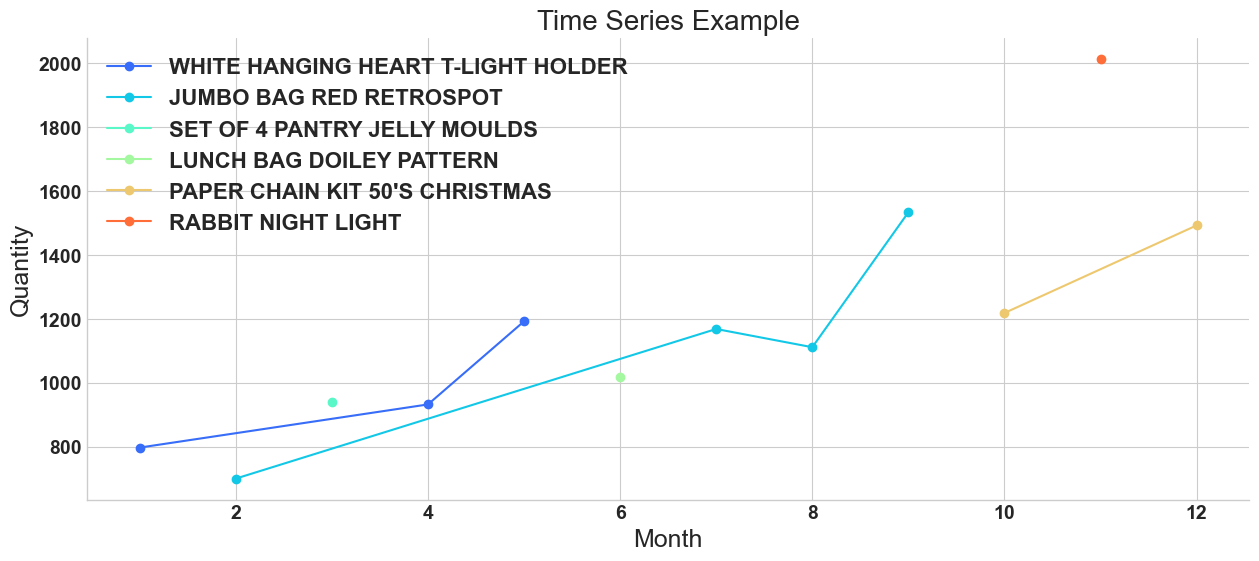

In [135]:
# max_df
colors = sns.color_palette('rainbow', len(max_df['Description'].unique()))
color_dict = {i:j for i,j in zip(max_df['Description'].unique() , colors)}

for i in max_df['Description'].unique():
    data = max_df[max_df['Description']==i]
    plt.plot(data['month'] , data['Quantity'], color= color_dict[i], marker = 'o', label=i)


plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Time Series Example')


plt.legend(loc=0)
plt.show()


### customer segmented by purchase history

In [137]:

# Create a new dataframe with customer-level summary statistics
customer_summary = no_canc.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique', 
    'Revenue': 'sum'
})

# Add columns for average spend and frequency of purchases
customer_summary['AvgSpend'] = customer_summary['Revenue'] / customer_summary['InvoiceNo']
customer_summary.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Segment customers based on their behavior
high_value_customers = customer_summary[customer_summary['AvgSpend'] > 1000]
medium_value_customers = customer_summary[(customer_summary['AvgSpend'] <= 1000) & (customer_summary['AvgSpend'] > 100)]
low_value_customers = customer_summary[customer_summary['AvgSpend'] <= 100]

# Print the number of customers in each segment
print(f"Number of high-value customers: {len(high_value_customers)}")
print(f"Number of medium-value customers: {len(medium_value_customers)}")
print(f"Number of low-value customers: {len(low_value_customers)}")


Number of high-value customers: 54
Number of medium-value customers: 3558
Number of low-value customers: 604


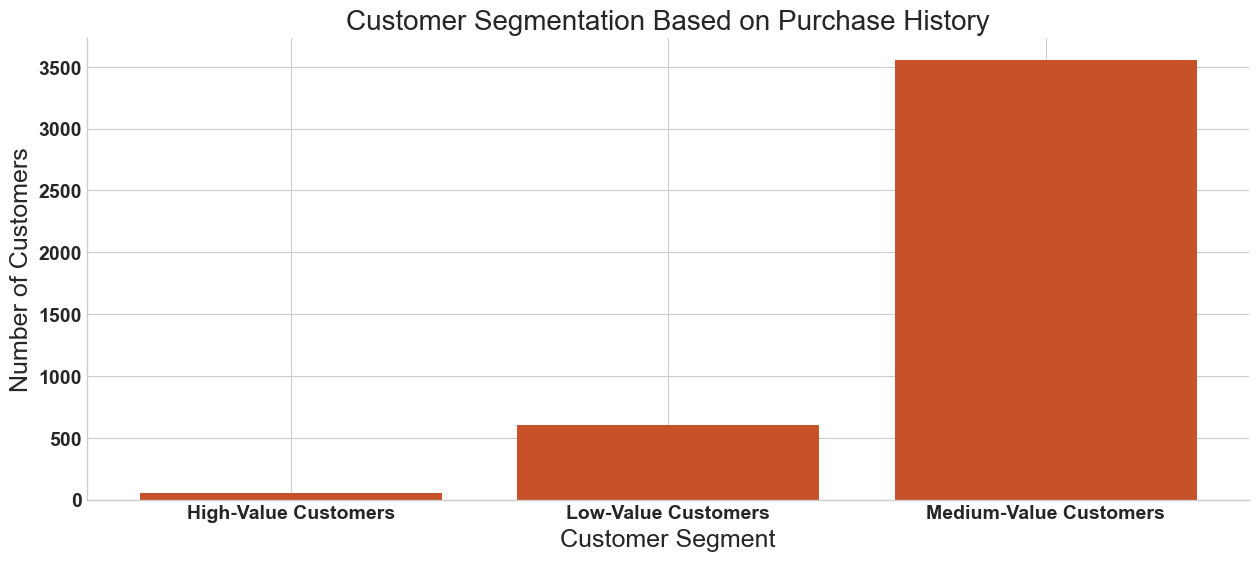

In [138]:
# Create a bar chart of customer segments
segments = ['High-Value Customers', 'Low-Value Customers', 'Medium-Value Customers']
counts = [len(high_value_customers), len(low_value_customers), len(medium_value_customers)]
plt.bar(segments, counts)
plt.title("Customer Segmentation Based on Purchase History")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

<Axes: ylabel='Country'>

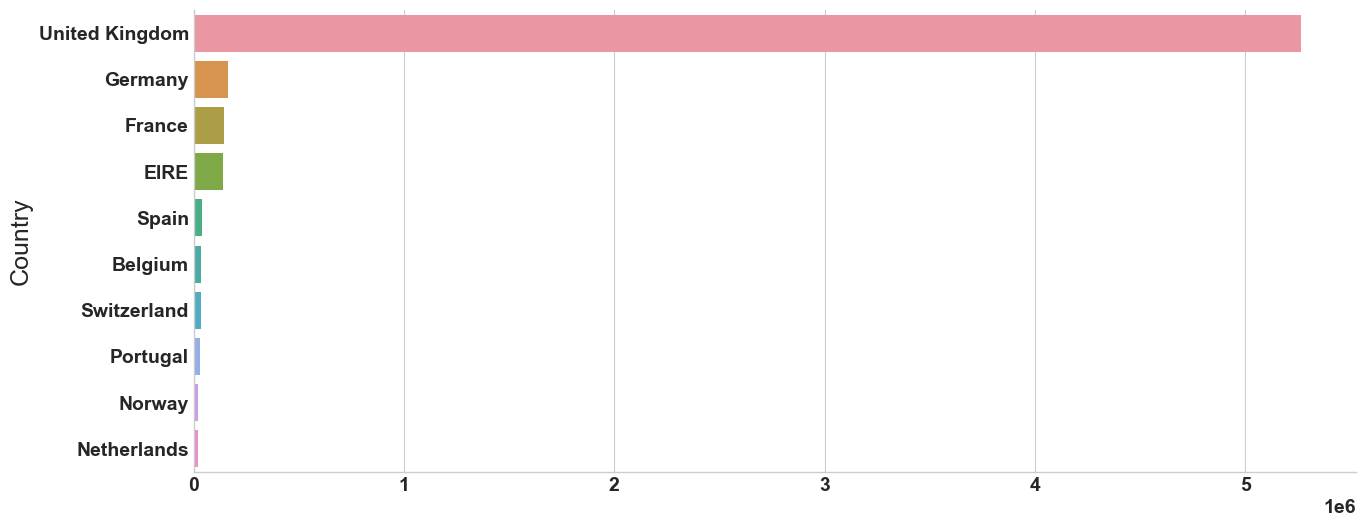

In [139]:
revenue_by_country = no_canc.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x= revenue_by_country.values , y= revenue_by_country.index , order=revenue_by_country.index)

### Conversion Rate

In [140]:
total_visitors = df['CustomerID'].nunique()

completed_actions = df[df['item_problem'].isna()]['CustomerID'].nunique()

conversion_rate = round((completed_actions / total_visitors) * 100, 2)

print("Conversion Rate:", conversion_rate, "%")

Conversion Rate: 0.0 %


In [141]:
total_visitors

4255

___what to dot___
- Conversion Rate is so good so i will segment users

In [142]:

# Create a new dataframe with customer-level summary statistics
customer_summary = no_canc.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique', 
    'Revenue': 'sum'
})

# Add columns for average spend and frequency of purchases
customer_summary['AvgSpend'] = customer_summary['Revenue'] / customer_summary['InvoiceNo']
customer_summary.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Segment customers based on their behavior
high_value_customers = customer_summary[customer_summary['AvgSpend'] > 1000]
medium_value_customers = customer_summary[(customer_summary['AvgSpend'] <= 1000) & (customer_summary['AvgSpend'] > 100)]
low_value_customers = customer_summary[customer_summary['AvgSpend'] <= 100]

# Print the number of customers in each segment
print(f"Number of high-value customers: {len(high_value_customers)}")
print(f"Number of medium-value customers: {len(medium_value_customers)}")
print(f"Number of low-value customers: {len(low_value_customers)}")


Number of high-value customers: 54
Number of medium-value customers: 3558
Number of low-value customers: 604


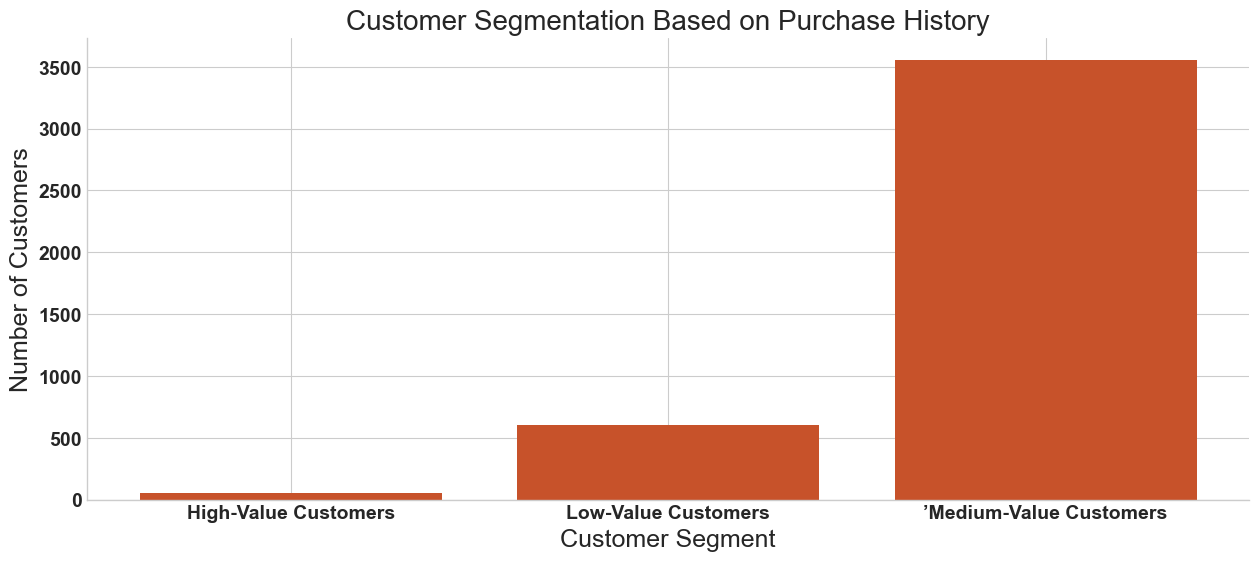

In [143]:
# Create a bar chart of customer segments
segments = ['High-Value Customers', 'Low-Value Customers', '’Medium-Value Customers']
counts = [len(high_value_customers), len(low_value_customers), len(medium_value_customers)]
plt.bar(segments, counts)
plt.title("Customer Segmentation Based on Purchase History")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

In [1]:
from git import GIT

In [2]:
git = GIT('D:\git play with data')

In [3]:
git.push(commit='test',filenames=['ecommerce'],origin='master')

Command '['git', 'add', 'ecommerce\\test.text']' returned non-zero exit status 128.
